# Test d'hypothèses dans le modèle binomial

Dans ce TP, on se propose d'illustrer certains résultats théoriques étudiés en cours et en TD, dans le cadre du modèle binomial.

On travaillera donc avec une suite de variables aléatoires $X_1, \dots, X_n$, indépendantes et de même loi de Bernoulli $\mathcal{B}(p)$, avec $p$ inconnu. On définit $S_n = \sum_{i=1}^n X_i$.

On considère le test d'hypothèse suivant :

$$ H_0 : p \in \Theta_0 \quad \text{ contre } \quad H_1 : p \in \Theta_1, $$

où $\Theta_0$ et $\Theta_1$ sont deux sous-ensembles disjoints de $[0,1]$.

## Test d'hypothèses simples

Dans cette partie, on s'intéresse au cas d'*hypothèses simples*, c'est-à-dire telles que $\Theta_0$ et $\Theta_1£ sont réduites à un singleton. On écrit alors :

$$ H_0 : p = p_0 \quad \text{ contre } \quad H_1 : p = p_1,$$

et on a donc $\Theta_0 = \{p_0\}$ et $\Theta_1 = \{p_1\}$.

### Zone de rejet

On reprend l'exemple de l'exercice 4 de la fiche de TD 1, où l'on a $n=50$, $p_0 = 3/4$ et $p_1=9/16$. On commence par définir ces quantités.

In [37]:
# importation des librairies Python utiles
from scipy import stats
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

In [38]:
n = 50
p0 = 3/4
p1 = 9/16

On va construire la région de rejet pour les niveaux suivants : 10%, 6%, 5%, 2% et 1%. On construit un vecteur qui va contenir ces valeurs.

In [39]:
alpha = [0.10,0.06,0.05,0.02,0.01]

La région de rejet est de la forme $\{S_n \leq k_\alpha\}$. On calcule $k_\alpha$ à l'aide de la fonction ppf (inverse de la fonction de répartition):

In [40]:
k = binom.ppf(alpha,n,p0)

Traçons la fonction de répartition de la loi binomiale de paramètres $n=50$ et $p=p_0$. 

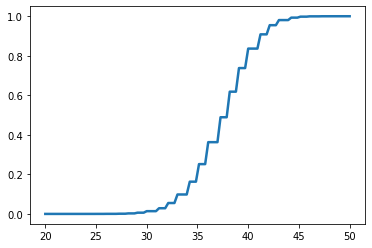

In [48]:
x = np.linspace(20,50,100)
plt.plot(x,binom.cdf(x, n, p0), linewidth=2.5)
plt.show()

On peut visualiser le lien entre niveau du test et région de rejet.

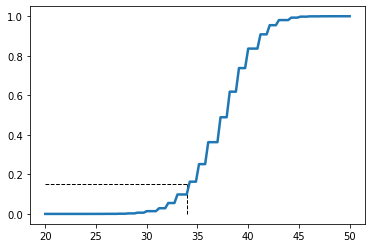

In [98]:
x = np.linspace(20,50,100)
y = binom.cdf(x, n, p0)
plt.plot(x,y,linewidth=2.5)

# Coloration de l'aire sous la courbe de la fonction de répartition et ajout d'une ligne horizontale 
# au niveau alpha souhaité
niveau = 0.15
seuil_rejet = binom.ppf(niveau,n,p0)
y2 = binom.cdf(x2, n, p0)
plt.hlines(niveau,20,seuil_rejet,linewidth=1,linestyle="--")
plt.vlines(seuil_rejet,0,niveau,linewidth=1,linestyle="--")

### Puissance
On va maintenant calculer la puissance du test pour chaque niveau $\alpha$ défini précédemment. La puissance se calcule après avoir défini la région de rejet. On la calcule à l'aide de la fonction de répartition de la loi binomiale.

In [43]:
puissance = binom.cdf(k,n,p1)
print(puissance)

[0.96705527 0.93873448 0.8946799  0.83186134 0.74957269]


L'erreur de deuxième espèce est définie comme $1-\pi$ où $\pi$ est la fonction puissance. On remarque effectivement qu'en augmentant l'erreur de première espèce (ou niveau) $\alpha$, on diminue l'erreur de deuxième espèce, et vice versa.

In [44]:
beta = 1-puissance
print(beta)

[0.03294473 0.06126552 0.1053201  0.16813866 0.25042731]


On peut visualiser le lien entre niveau et puissance à l'aide du graphe suivant :

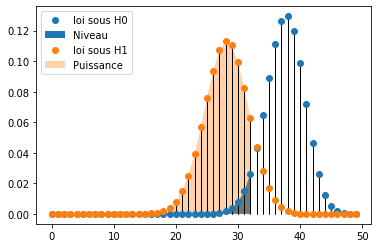

In [143]:
# valeurs des fonctions de répartition sous H0 et sous H1
x = np.arange(0,50,1)
pdfH0 = binom.pmf(x,n,p0)
pdfH1 = binom.pmf(x,n,p1)

# configuration du graphe
fig, ax = plt.subplots()
pdf0 = ax.plot(x,pdfH0,'o')
ax.vlines(x,0,pdfH0,lw=1)
pdf1 = ax.plot(x,pdfH1,'o')
ax.vlines(x,0,pdfH1,lw=1)

# Visualisation du niveau et de la puissance au niveau alpha souhaité
niveau = alpha[1]
seuil_rejet = binom.ppf(niveau,n,p0)
x2 = np.arange(0,seuil_rejet,1)
y2_H0 = binom.pmf(x2, n, p0)
y2_H1 = binom.pmf(x2, n, p1)
auc0 = ax.fill_between(x2,y2_H0,0,linewidth=2.5,alpha=1) # attention ici alpha est un paramètre de transparence graphique !
auc1 = ax.fill_between(x2,y2_H1,0,linewidth=2.5,alpha=0.35)

ax.legend((pdf0[0],auc0,pdf1[0],auc1), ('loi sous H0', 'Niveau', 'loi sous H1', 'Puissance'))

In [ ]:
Et le lien entre erreur de première espèce se lit sur le graphe suivant :

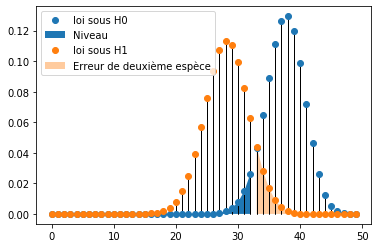

In [148]:
# configuration du graphe
fig, ax = plt.subplots()
pdf0 = ax.plot(x,pdfH0,'o')
ax.vlines(x,0,pdfH0,lw=1)
pdf1 = ax.plot(x,pdfH1,'o')
ax.vlines(x,0,pdfH1,lw=1)

# Visualisation du niveau et de la puissance au niveau alpha souhaité
niveau = alpha[1]
seuil_rejet = 
x2 = np.arange(0,seuil_rejet,1)
y2_H0 = binom.pmf(x2, n, p0)
x3 = np.arange(seuil_rejet,50,1)
y3_H1 = binom.pmf(x3, n, p1)
auc0 = ax.fill_between(x2,y2_H0,0,linewidth=2.5,alpha=1) # attention ici alpha est un paramètre de transparence graphique !
err2esp = ax.fill_between(x3,y3_H1,0,linewidth=2.5,alpha=0.4)

ax.legend((pdf0[0],auc0,pdf1[0],err2esp), ('loi sous H0', 'Niveau', 'loi sous H1', 'Erreur de deuxième espèce'))

## Test d'hypothèses composites

### Test unilatéral

Dans cette partie, on s'intéresse au test unilatéral suivant :
$$ H_0 : p = p_0 \quad \text{ contre } \quad H_1 : p > p_0.$$

On a donc $\Theta_0 = \{p_0\}$ et $\Theta_1 = ]p_0,1]$.
### Test bilatéral
